In [1]:
import TwitterAPICALL
import tweetCleaner
from tweetCleaner import tweetCleaner
import matplotlib
from matplotlib import pyplot as plt
import json
import modelAnalyzer
from modelAnalyzer import modelAnalyzer
import sklearn
from sklearn import tree

Note -- please ensure you are using matplotlib version 3.5 or newer, or else the graphing functions will not work.

In [2]:
def show_Tree(T,X, name):
    fig, ax = plt.subplots(1, figsize = (10, 10))
    p = tree.plot_tree(T, filled = True, feature_names = X.columns)
    ax.set(title = "Decision Tree for " + name)
    plt.show()

This project contains 3 main classes with which we will be working with: TwitterAPICALL, which is used to access and download tweets from the twitter api; tweetCleaner, which is used to process and prepare the tweets for further data analysis; and modelAnalyzer, which retrieves, stores, and fits various models on data provided to it. 

The next box shows an example of how we can use TwitterAPICALL to get hundreds of tweets from the past 7 days given a search query.

In [3]:
myjson = TwitterAPICALL.getPastSevenDays("Wordle", 100)

Beginning Tweet Retrieval - This may take up to a few minutes depending on volume
Retrieved all tweets with no issues


To convert this json into readable and analyzable data, we create a tweetCleaner object and call the prepTweets() function on our data. This function makes 4 separate function calls, with the purpose of moving all text to lower-case, removing links, removing repeats, and removing stop words from the tweets. 

In [4]:
g = tweetCleaner(myjson)
g.prepTweets()

C:\Users\Fidel Ca$hflow\Pic16AFinalProj\tweetCleaner.py:37: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif item['text'] in repeatArray:
[nltk_data] Downloading package stopwords to C:\Users\Fidel
[nltk_data]     Ca$hflow\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Next, we create a modelAnalyzer class to analyze this data. The modelAnalyzer class is initialized with a list of the names of all json dataframes we want to look at. The modelAnalyzer is also responsible for downloading and saving these dataframes in the first place, so that we may look back at this data in the future without needing to re-call the twitter API. We will initialize an empty modelAnalyzer class and use it to store and save our new data.

In [5]:
modelAnalysis = modelAnalyzer([])
modelAnalysis.addJson(g.cleanedJson, "Wordle")

[nltk_data] Downloading package punkt to C:\Users\Fidel
[nltk_data]     Ca$hflow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Fidel
[nltk_data]     Ca$hflow\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


We now have a json document titled "Wordle.json" in our directory. For convenience, we have included multiple datasets in this directory for additional analysis. The Twitter API sets a limit on number of API calls per 15 minutes, and retrieving the last 7 days of tweets requires quite a lot of API calls without higher authorization status. To avoid hitting the rate limit, we will now add some of the pre-formed tweet datasets to our modelAnalyzer

In [6]:
modelAnalysis.updateJsonList('Bob_Ross.json')
modelAnalysis.updateJsonList('Kanye_Pete')
modelAnalysis.updateJsonList('Ukraine_Russia')
print(modelAnalysis.jsonList)

['Wordle.json', 'Bob_Ross.json', 'Kanye_Pete.json', 'Ukraine_Russia.json']


Now, we will try to fit predictive models to this data. This uses the 'bag of words' technique to vectorize all tweets, as well as the NLTK sentiment analyzer to score each tweet for overall sentiment. Both the vectorized words and sentiment are passed into models as the 'X' predictor variables. The target variable 'y' is the number of likes the tweet receives -- For quantitative models, this is the raw like count, whereas for categorical models, the like counts are converted into categories ranging from "Very Unpopular" up to "Extremely Popular" and "Viral". The modelAnalyzer has many inner functions that prepare and parse the data for each model, however, the function fitAllData() is a convenient catch-all that creates a Decision Tree model, Lasso model, and MultinomialNB model for each json dataset loaded in the modelAnalyzer. We will use this below. Note: The minLikes kwarg cuts out any tweets with a like count lower than the specified number. This is because some datasets may have a large number of tweets with '0' likes, either due to a low follower count or very recent post date, which can mess with the models. 

Scores for dataset Wordle.json
 --------- 
Best Depth for Decision Tree: 6
Decision Tree Score on Training Data: 0.6944444444444444
Decision Tree Score on Test Data: 0.3076923076923077
 --------- 
Lasso Score on Training Data: 0.9990104599683644
Lasso Score on Test Data: -9638.549750427872
Adjusting for plot, score too negative
 --------- 
Bayes Model Score on Training Data: 0.6388888888888888
Bayes Model Score on Test Data: 0.15384615384615385
 /////////////// 
Scores for dataset Bob_Ross.json
 --------- 
Best Depth for Decision Tree: 29
Decision Tree Score on Training Data: 0.9313725490196079
Decision Tree Score on Test Data: 0.17647058823529413
 --------- 
Lasso Score on Training Data: 0.8673680835906246
Lasso Score on Test Data: 0.017755046025572874
 --------- 
Bayes Model Score on Training Data: 0.6764705882352942
Bayes Model Score on Test Data: 0.23529411764705882
 /////////////// 
Scores for dataset Kanye_Pete.json
 --------- 
Best Depth for Decision Tree: 20
Decision Tree Score

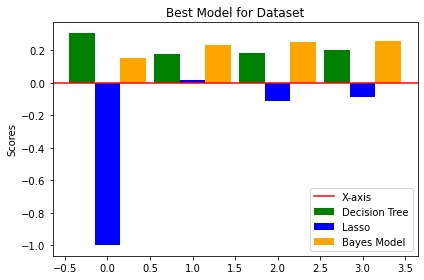

In [7]:
fig = modelAnalysis.fitAllData(minLikes = 10)
plt.show()

If we'd like to, we can do more specific model analysis on desired datasets, from within the modelAnalyzer class. To get a dictionary of all datasets currently loaded, we call getAllData(). We can then do specific analysis, such as finding the best fit tree, by calling specific functions. Here is an example:

1


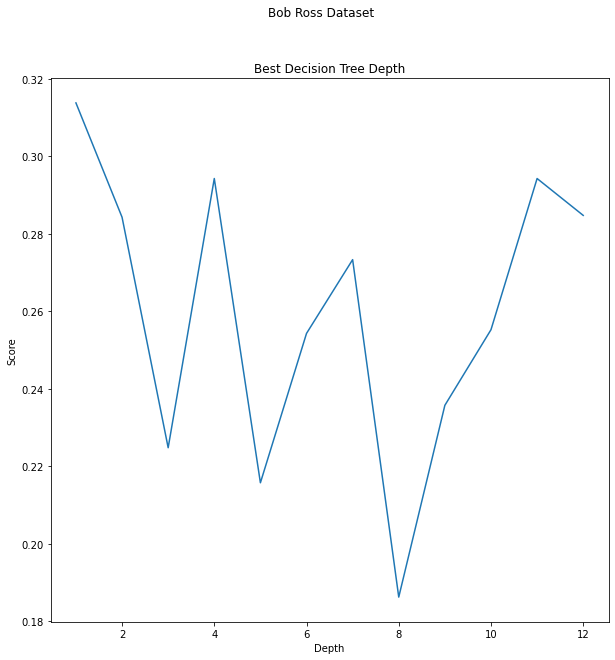

In [8]:
allData = modelAnalysis.getAllData(minLikes = 10)
(X,y) = allData['Bob_Ross.json']

best_depth, fig = modelAnalysis.best_fit_Tree(X, y, max_tree_depth = 12)
fig.suptitle("Bob Ross Dataset")
print(best_depth)
plt.show()

If we'd like to get a visualization of the decision tree being used, we can use the function defined in this demofile by itself, show_Tree(). This function requires a tree, the X dataFrame, and the name of the dataset to produce a plot for us.

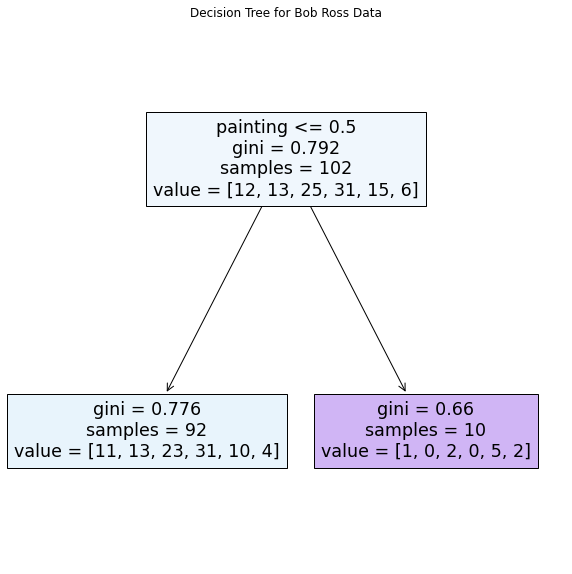

In [9]:
T, X_train, X_test, y_train, y_test = modelAnalysis.fit_tree(X, y, max_depth = best_depth)

show_Tree(T, X, "Bob Ross Data")